## <center> Cataract Detection in Human Eyes </center>

#### What is Cataract ?

A cataract is a cloudy area in the lens of the eye that leads to a decrease in vision. Cataracts often develop slowly and can affect one or both eyes. Symptoms may include faded colors, blurry or double vision, halos around light, trouble with bright lights, and trouble seeing at night. This may result in trouble driving, reading, or recognizing faces.

#### Importing necessary libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing import image

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### reading dataframe contaitng address of image and class of image

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/Eye Dissease/filtered_df_new.csv")
df = df.sample(frac = 1)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df.head()

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename,newColumn_Right,newColumn_Left,class
746,2242,63,Male,2242_left.jpg,2242_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Datasets/Eye Dissease/o...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2242_right.jpg,cataract,cataract,cataract
793,2108,64,Female,2108_left.jpg,2108_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Datasets/Eye Dissease/o...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2108_left.jpg,cataract,cataract,cataract
1042,2246,69,Male,2246_left.jpg,2246_right.jpg,cataract,cataract,0,0,0,1,0,0,0,0,/content/drive/MyDrive/Datasets/Eye Dissease/o...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2246_right.jpg,cataract,cataract,cataract
942,2103,61,Female,2103_left.jpg,2103_right.jpg,cataract，mild nonproliferative retinopathy,cataract,0,1,0,1,0,0,0,0,/content/drive/MyDrive/Datasets/Eye Dissease/o...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2103_right.jpg,cataract,cataract,cataract
1136,2156,78,Male,2156_left.jpg,2156_right.jpg,cataract,mild nonproliferative retinopathy,0,1,0,1,0,0,0,0,/content/drive/MyDrive/Datasets/Eye Dissease/o...,['C'],"[0, 0, 0, 1, 0, 0, 0, 0]",2156_left.jpg,mild nonproliferative retinopathy,cataract,cataract


In [5]:
img_path=list(df['filepath'])
img_label=list(df['class'])

#### Create Dataset

In [6]:
import cv2
from tqdm import tqdm

In [7]:
dataset=[]
for img_path,label in tqdm(zip(img_path,img_label)):
    try:
      image = cv2.imread(img_path,cv2.IMREAD_COLOR)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = cv2.resize(image,(224,224))
      dataset.append([np.array(image),label])
    except:
      continue

1200it [06:02,  3.31it/s]


#### Size of Dataset

In [ ]:
len(dataset)

1200

#### Plotting the Images

In [8]:
import random

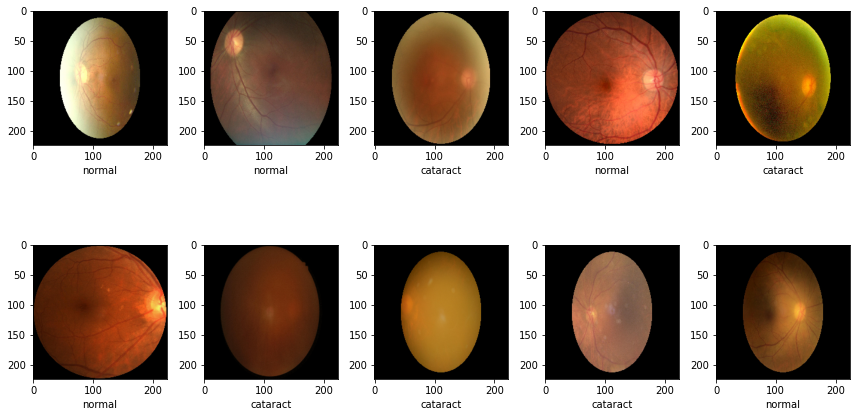

In [9]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    label = dataset[sample][1]

    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout() 

#### dependent - independent feature split

In [11]:
x = np.array([i[0] for i in dataset]).reshape(-1,224,224,3)
y_label = np.array([i[1] for i in dataset]) # here labels are in string format

#### Converting labels to integers

In [13]:
y=[]
for l in list(y_l):
  if l=='normal':
    y.append(0)
  else:
    y.append(1)

In [14]:
y=np.array(y)

#### Train-Test split

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

 #### <center>  Defining callbacks </center>

#### Early Stopping

In [49]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [55]:

earlystop = EarlyStopping(monitor = 'val_accuracy', # value being monitored for improvement
                          min_delta = 0, #Abs value and is the min change required before we stop
                          patience = 10, #Number of epochs we wait before stopping 
                          verbose = 1,
                        restore_best_weights = True,mode='max') #keeps the best weigths once stopped

#### checkpoints

In [50]:
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Datasets/Eye Dissease/cataract__detection_model.h5",
                             monitor="val_accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=1)

 ####  <center>Applying transfer learning models </center>

#### VGG 16 with pretrained weights

In [100]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50
 
vgg = vgg16.VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(224,224,3)
)

In [101]:
for layer in vgg.layers:
    layer.trainable = False

In [102]:
from keras import Sequential
from keras import layers
from keras.layers import Flatten,Dense
model_vgg = Sequential()
model_vgg.add(vgg)
model_vgg.add(Dense(256, activation='relu'))
model_vgg.add(layers.Dropout(rate=0.5))
model_vgg.add(Dense(128, activation='sigmoid'))
model_vgg.add(layers.Dropout(rate=0.2))
model_vgg.add(Dense(128, activation='relu'))
model_vgg.add(layers.Dropout(0.1))
model_vgg.add(Flatten())
model_vgg.add(Dense(1,activation="sigmoid"))

In [103]:
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
dense_8 (Dense)              (None, 7, 7, 256)         131328    
_________________________________________________________________
dropout_36 (Dropout)         (None, 7, 7, 256)         0         
_________________________________________________________________
dense_9 (Dense)              (None, 7, 7, 128)         32896     
_________________________________________________________________
dropout_37 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
dense_10 (Dense)             (None, 7, 7, 128)         16512     
_________________________________________________________________
dropout_38 (Dropout)         (None, 7, 7, 128)        

In [104]:
model_vgg.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [105]:
history = model_vgg.fit(x_train,y_train,batch_size=32,epochs=40,callbacks=earlystop,validation_data=(x_test,y_test))

Epoch 1/40
30/30 [==============================] - 7s 193ms/step - loss: 0.6269 - accuracy: 0.6828 - val_loss: 0.3034 - val_accuracy: 0.8833
Epoch 2/40
30/30 [==============================] - 5s 169ms/step - loss: 0.3579 - accuracy: 0.8643 - val_loss: 0.2641 - val_accuracy: 0.9125
Epoch 3/40
30/30 [==============================] - 5s 169ms/step - loss: 0.2892 - accuracy: 0.8895 - val_loss: 0.2401 - val_accuracy: 0.9167
Epoch 4/40
30/30 [==============================] - 5s 169ms/step - loss: 0.2488 - accuracy: 0.8967 - val_loss: 0.2327 - val_accuracy: 0.9125
Epoch 5/40
30/30 [==============================] - 5s 171ms/step - loss: 0.2156 - accuracy: 0.9118 - val_loss: 0.2238 - val_accuracy: 0.9167
Epoch 6/40
30/30 [==============================] - 5s 171ms/step - loss: 0.2200 - accuracy: 0.9166 - val_loss: 0.2791 - val_accuracy: 0.9125
Epoch 7/40
30/30 [==============================] - 5s 171ms/step - loss: 0.2079 - accuracy: 0.9220 - val_loss: 0.2075 - val_accuracy: 0.9333
Epoch 

In [106]:
model_vgg.save('/content/drive/MyDrive/Datasets/Eye Dissease/models/vgg16.h5')

* #### Train test Accuracy

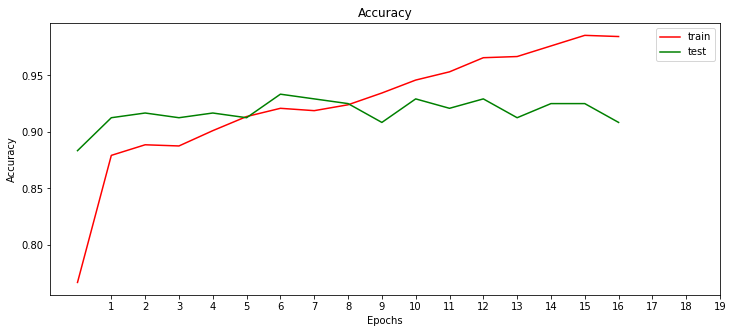

In [108]:
plt.figure(figsize=(12,5))
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r-', label='train')
plt.plot(history.history['val_accuracy'],'g-', label='test')
plt.xticks([i for i in range(1,20)],[i for i in range(1,20)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

#### Classification Report

In [1]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model_vgg.predict_classes(x_test)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       115
           1       0.95      0.92      0.93       125

    accuracy                           0.93       240
   macro avg       0.93      0.93      0.93       240
weighted avg       0.93      0.93      0.93       240



#### INCEPTION V3

In [109]:
inception = inception_v3.InceptionV3(
    weights='imagenet', 
    include_top=False,  
    input_shape=(224,224,3)
)

In [113]:
model_inc = Sequential()
model_inc.add(inception)
model_inc.add(Dense(256, activation='relu'))
model_inc.add(layers.Dropout(rate=0.5))
model_inc.add(Dense(128, activation='sigmoid'))
model_inc.add(layers.Dropout(rate=0.2))
model_inc.add(Dense(128, activation='relu'))
model_inc.add(layers.Dropout(0.1))
model_inc.add(Flatten())
model_inc.add(Dense(1,activation="sigmoid"))

In [114]:
model_inc.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [115]:
history_inception = model_inc.fit(x_train,y_train,batch_size=32,epochs=40,callbacks = earlystop,validation_data=(x_test,y_test))

Epoch 1/40
30/30 [==============================] - 38s 548ms/step - loss: 0.5378 - accuracy: 0.7124 - val_loss: 1.1438 - val_accuracy: 0.5208
Epoch 2/40
30/30 [==============================] - 9s 317ms/step - loss: 0.3106 - accuracy: 0.8813 - val_loss: 0.8361 - val_accuracy: 0.4417
Epoch 3/40
30/30 [==============================] - 9s 316ms/step - loss: 0.3486 - accuracy: 0.8707 - val_loss: 0.5384 - val_accuracy: 0.7292
Epoch 4/40
30/30 [==============================] - 9s 316ms/step - loss: 0.2863 - accuracy: 0.8937 - val_loss: 0.7479 - val_accuracy: 0.7292
Epoch 5/40
30/30 [==============================] - 9s 317ms/step - loss: 0.2255 - accuracy: 0.9244 - val_loss: 1.1707 - val_accuracy: 0.5458
Epoch 6/40
30/30 [==============================] - 9s 317ms/step - loss: 0.2280 - accuracy: 0.9263 - val_loss: 0.6474 - val_accuracy: 0.7375
Epoch 7/40
30/30 [==============================] - 10s 318ms/step - loss: 0.2359 - accuracy: 0.9225 - val_loss: 0.6362 - val_accuracy: 0.8500
Epoc

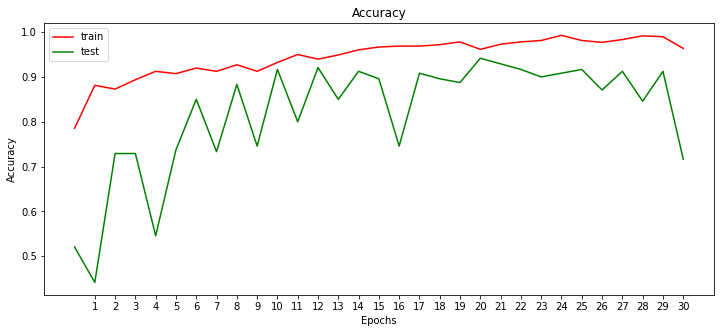

In [117]:
plt.figure(figsize=(12,5))
plt.title('Accuracy')
plt.plot(history_inception.history['accuracy'],'r-', label='train')
plt.plot(history_inception.history['val_accuracy'],'g-', label='test')
plt.xticks([i for i in range(1,31)],[i for i in range(1,31)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

In [2]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model_inc.predict_classes(x_test)

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       115
           1       0.97      0.91      0.94       125

    accuracy                           0.94       240
   macro avg       0.94      0.94      0.94       240
weighted avg       0.94      0.94      0.94       240



In [130]:
model_inc.save("/content/drive/MyDrive/Datasets/Eye Dissease/models/inception.h5")

In [65]:
import time

#### Resnet

In [133]:
resnet_model = resnet50.ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))

In [135]:
model_res = Sequential()
# model.add(vgg_model = vgg16.VGG16(weights='imagenet'))
model_res.add(resnet_model)
model_res.add(Dense(256, activation='relu'))
model_res.add(layers.Dropout(rate=0.5))
model_res.add(Dense(128, activation='sigmoid'))
model_res.add(layers.Dropout(rate=0.2))
model_res.add(Dense(128, activation='relu'))
model_res.add(layers.Dropout(0.1))
model_res.add(Flatten())
model_res.add(Dense(1,activation="sigmoid"))

In [136]:
model_res.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [138]:
history_resnet50 = model_res.fit(x_train,y_train,batch_size=32,epochs=40,callbacks=earlystop,validation_data=(x_test,y_test))

Epoch 1/40
30/30 [==============================] - 27s 512ms/step - loss: 0.4884 - accuracy: 0.7728 - val_loss: 1.3574 - val_accuracy: 0.4792
Epoch 2/40
30/30 [==============================] - 14s 452ms/step - loss: 0.3719 - accuracy: 0.8650 - val_loss: 0.5992 - val_accuracy: 0.7417
Epoch 3/40
30/30 [==============================] - 14s 452ms/step - loss: 0.3616 - accuracy: 0.8569 - val_loss: 0.7557 - val_accuracy: 0.7000
Epoch 4/40
30/30 [==============================] - 14s 453ms/step - loss: 0.2804 - accuracy: 0.9054 - val_loss: 0.9945 - val_accuracy: 0.7125
Epoch 5/40
30/30 [==============================] - 14s 453ms/step - loss: 0.2641 - accuracy: 0.9027 - val_loss: 0.4903 - val_accuracy: 0.8250
Epoch 6/40
30/30 [==============================] - 14s 454ms/step - loss: 0.2221 - accuracy: 0.9155 - val_loss: 3.9276 - val_accuracy: 0.4792
Epoch 7/40
30/30 [==============================] - 14s 454ms/step - loss: 0.2493 - accuracy: 0.9045 - val_loss: 0.3841 - val_accuracy: 0.8583

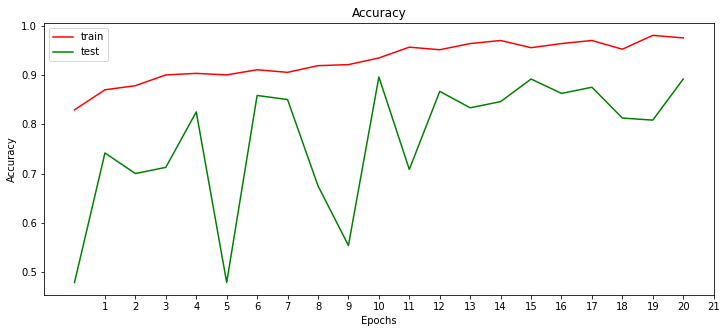

In [140]:
plt.figure(figsize=(12,5))
plt.title('Accuracy')
plt.plot(history_resnet50.history['accuracy'],'r-', label='train')
plt.plot(history_resnet50.history['val_accuracy'],'g-', label='test')
plt.xticks([i for i in range(1,22)],[i for i in range(1,22)])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show();

In [3]:
y_pred = model_res.predict_classes(x_test)

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.89       115
           1       0.87      0.94      0.90       125

    accuracy                           0.90       240
   macro avg       0.90      0.89      0.90       240
weighted avg       0.90      0.90      0.90       240



####  From all the experiments done above I can see that Inception V3 has given the best results .

#### <center>  Thankyou  </center> 